# Explore here

In [1]:
# Your code here
import pandas as pd
df = pd.read_csv('../data/raw/River_Arno.csv')
df

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [3]:
df_st = df[['Date', 'Hydrometry_Nave_di_Rosano']]
df_st['Date'] = pd.to_datetime(df_st['Date'],format='%d/%m/%Y').dt.date
df_st = df_st.set_index('Date')

/tmp/ipykernel_18019/2585426437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_st['Date'] = pd.to_datetime(df_st['Date'],format='%d/%m/%Y').dt.date


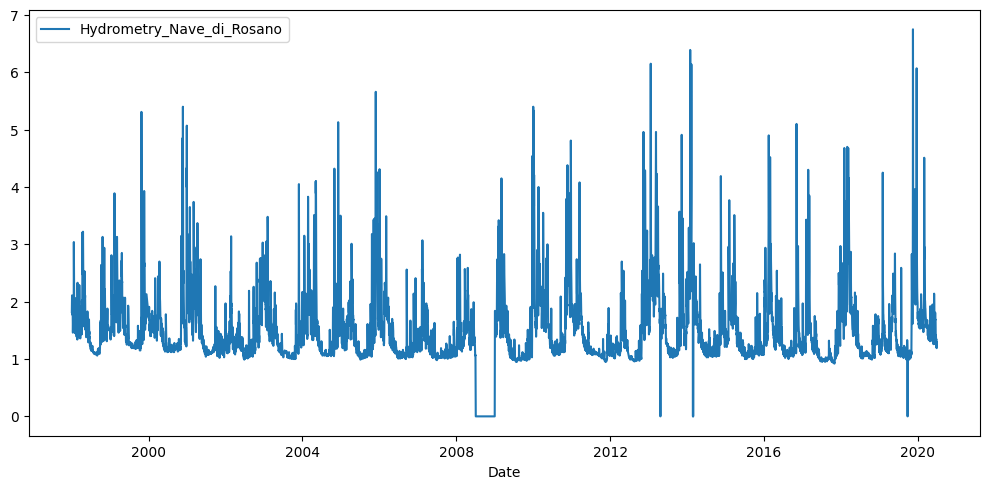

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)

plt.tight_layout()
plt.show()

In [5]:
df_st.dropna(inplace=True)

In [6]:
#pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicion = seasonal_decompose(df_st,period=365)

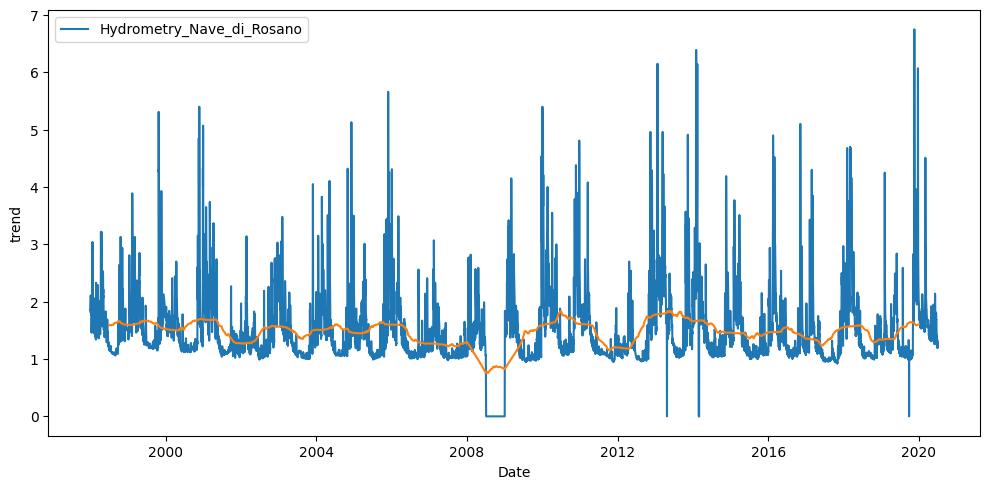

In [7]:
#Parametros
tendencia = decomposicion.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=tendencia)

plt.tight_layout()
plt.show()

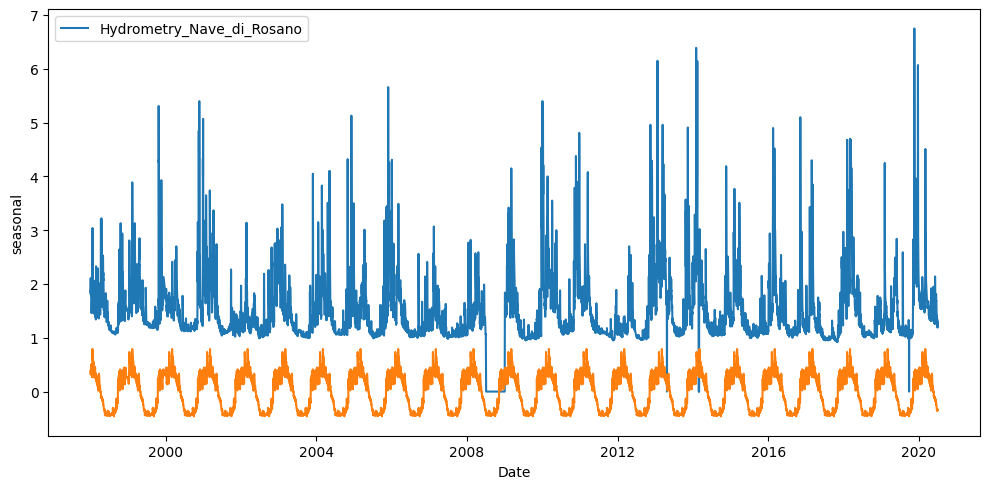

In [8]:
#Parametros
Estacional = decomposicion.seasonal

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=Estacional)

plt.tight_layout()
plt.show()

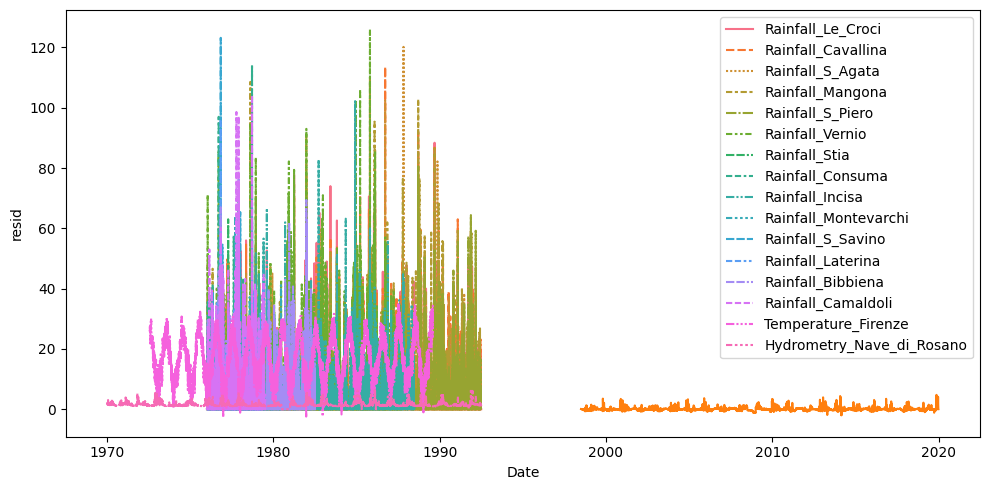

In [9]:
#Parametros
Ruido= decomposicion.resid
plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=Ruido)

plt.tight_layout()
plt.show()

In [10]:
df_train = df_st[(df_st.index<pd.to_datetime'2020-06-01') .date()]
df_test = df_st[(df_st.index>=pd.to_datetime'2020-06-01') .date()]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1048252840.py, line 1)

In [ ]:
#pip install pmdarima
from pmdarima import auto_arima

model = auto_arima(df_train, seasonal=False, trace=True,m=365)